In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv(r"C:\Users\USUARIO\Downloads\recipe_site_traffic_2212 (1).csv")
print(df.head())
print(df.info())

   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servin

## Data Validation and Cleaning

In [3]:
#function to determine missing values
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [20]:
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [5]:
#determine for each column their unique values and show many there are
for col in df[['category', 'high_traffic']]:
    unique_values = df[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values: {df[col].unique()} ")

Column 'category' has 11 unique values: ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert'] 
Column 'high_traffic' has 1 unique values: ['High' nan] 


In [6]:
#replace nans in 'high_traffic' with 'other' string
df['high_traffic'] = df['high_traffic'].fillna('other')

In [7]:
#replace numerical columns nans with median values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
#replace categorical columns nans with mode values
for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)    


In [8]:
#column categorical for target variable high_traffic
df['high_traffic_cat'] = df['high_traffic'].replace({'High': 1, 'other': 0}).astype('category')
df.head()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_600\2652668028.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['high_traffic_cat'] = df['high_traffic'].replace({'High': 1, 'other': 0}).astype('category')


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_cat
0,1,288.55,21.48,4.55,10.80,Pork,6,High,1
1,2,35.48,38.56,0.66,0.92,Potato,4,High,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,other,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,other,0


In [9]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,427.846019,34.323464,8.799641,23.416283
std,273.519652,441.673556,42.836191,14.306785,35.486699
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,576.225000,42.590000,9.285000,28.530000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [ ]:
#validate cleaning process for each column
for col in df.columns:
    missing_count = df[col].isnull().sum()
    print(f"Column '{col}' has {missing_count} missing values after cleaning.")


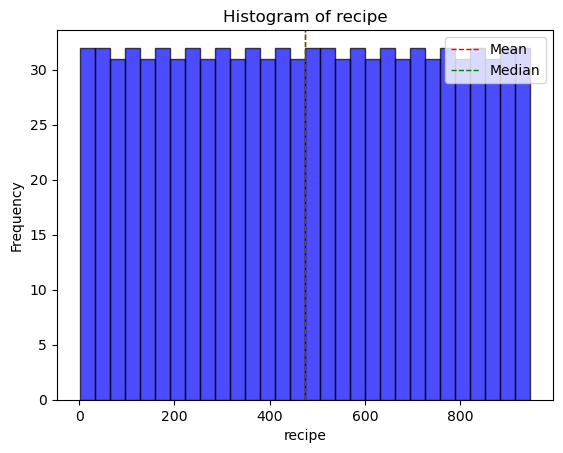

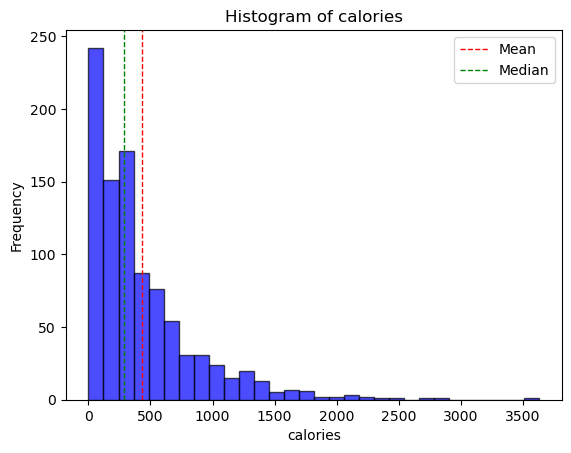

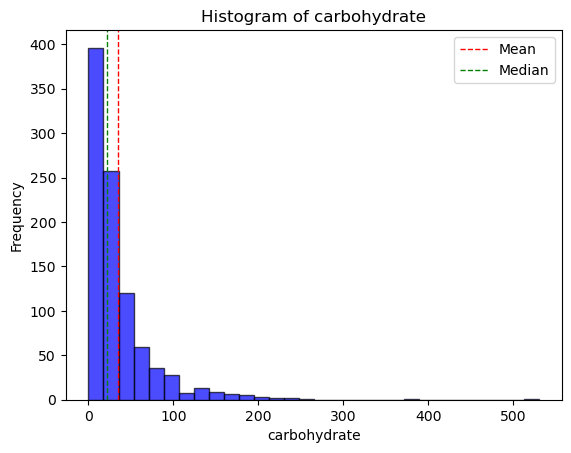

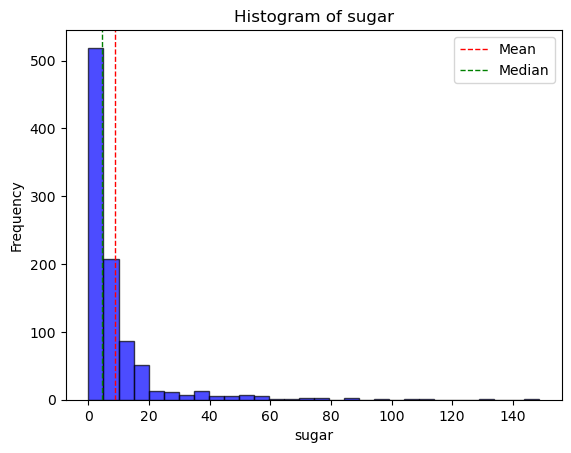

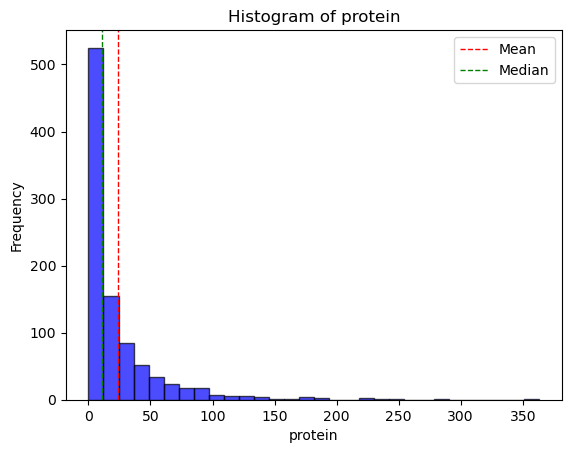

In [10]:
#histogram complete of numerical columns showing mean and median
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.hist(df[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

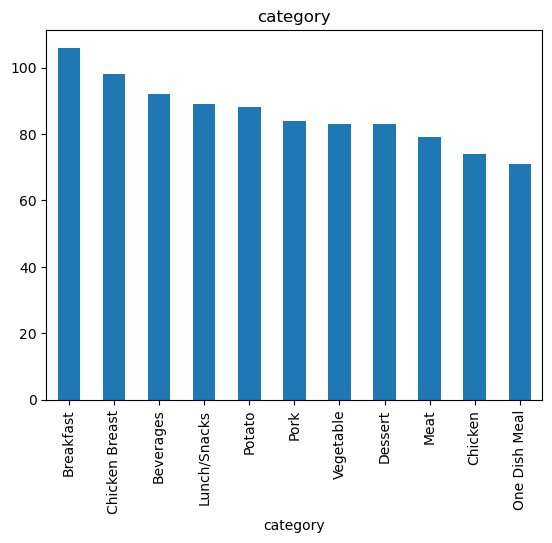

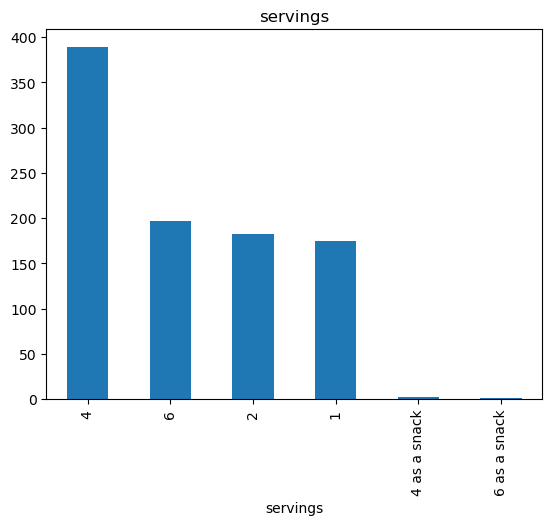

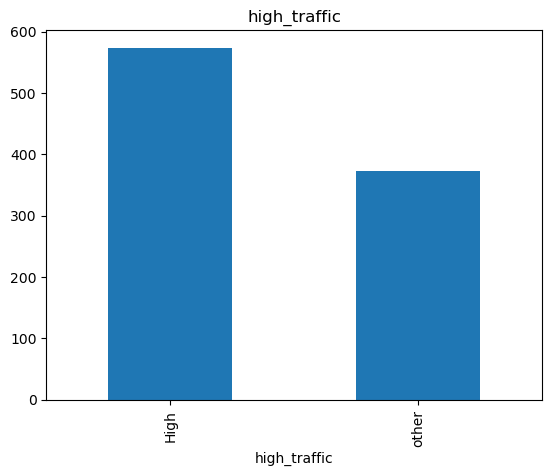

In [11]:
#bar plot of categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

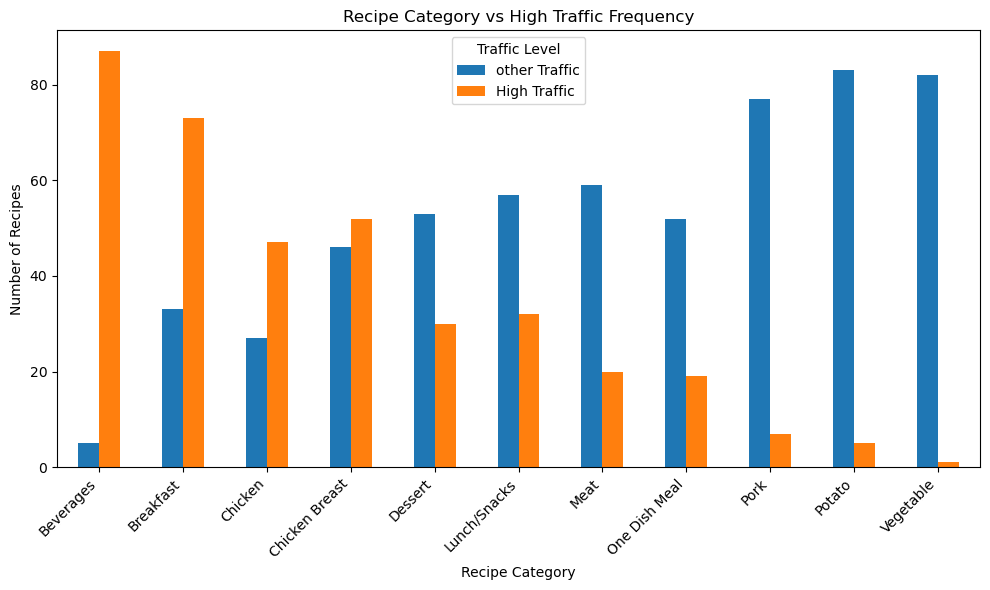

In [12]:
#bar plot showing relationship between category and high_traffic
traffic_counts = (
    df
    .groupby(['category', 'high_traffic'])
    .size()
    .unstack(fill_value=0)
)

traffic_counts.columns = ['other Traffic', 'High Traffic']
traffic_counts.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.xlabel('Recipe Category')
plt.ylabel('Number of Recipes')
plt.title('Recipe Category vs High Traffic Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Traffic Level')
plt.tight_layout()
plt.show()



In [13]:
#transform category column into numerical using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded = encoder.fit_transform(df[['category','servings']])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['category', 'servings'])
)

df_final = pd.concat([df.drop(['category','servings'], axis=1), encoded_df], axis=1)
df_final.head()



,recipe,calories,carbohydrate,sugar,protein,high_traffic,high_traffic_cat,category_Breakfast,category_Chicken,category_Chicken Breast,...,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_2,servings_4,servings_4 as a snack,servings_6,servings_6 as a snack
0,1,288.55,21.48,4.55,10.80,High,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,35.48,38.56,0.66,0.92,High,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,914.28,42.68,3.09,2.88,other,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,97.03,30.56,38.63,0.02,High,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,27.05,1.85,0.80,0.53,other,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0



Before performing any analysis or modeling, all variables were validated to ensure the dataset was suitable for analysis.

The validation process included:
- Checking data types for each variable
- Identifying missing values
- Verifying that variable ranges were reasonable
- Confirming the interpretation of the target variable


The target variable `high_traffic` contains two values: `"High"` and missing values.
Based on the dataset description, missing values indicate recipes that did not generate high traffic.
Therefore, missing values were interpreted as `"Not High"` rather than being imputed or removed.

This approach preserves all observations and ensures a clear binary classification target aligned with the business objective.


# Modeling

In [14]:
# install scikit-learn if not already installed
%pip install -q scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Note: you may need to restart the kernel to use updated packages.


In [15]:
#split data into train and test sets
X = df_final.drop(columns=['high_traffic', 'high_traffic_cat','recipe'])
y = df_final['high_traffic_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy score: 0.74


c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


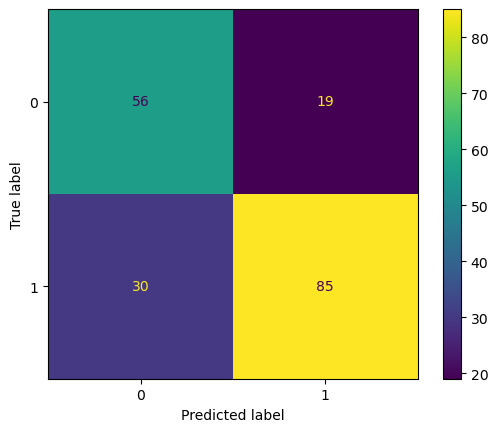

              precision    recall  f1-score   support

           0       0.65      0.75      0.70        75
           1       0.82      0.74      0.78       115

    accuracy                           0.74       190
   macro avg       0.73      0.74      0.74       190
weighted avg       0.75      0.74      0.74       190



In [16]:
#Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
#predictions
y_pred = model.predict(X_test)
#Evaluate model
accuracy_predict = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy_predict:.2f}")
#matrix confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)    
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

# comparison model

Random Forest Accuracy score: 0.72


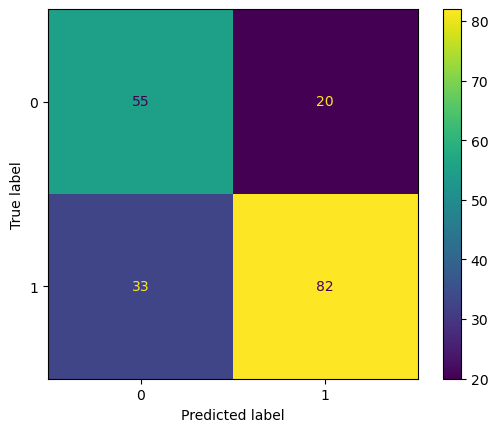

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        75
           1       0.80      0.71      0.76       115

    accuracy                           0.72       190
   macro avg       0.71      0.72      0.72       190
weighted avg       0.73      0.72      0.72       190



In [17]:
#random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
#predictions
y_pred_rf = rf_model.predict(X_test)    
#Evaluate model
accuracy_predict_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy score: {accuracy_predict_rf:.2f}")
#matrix confusion random forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)    
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                display_labels=rf_model.classes_)
disp_rf.plot()
plt.show()
print(classification_report(y_test, y_pred_rf))

# Hipertuning parameters

In [18]:
#Grid Search CV for hyperparameter tuning Random Forest
from sklearn.model_selection import GridSearchCV    
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                            cv=5, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


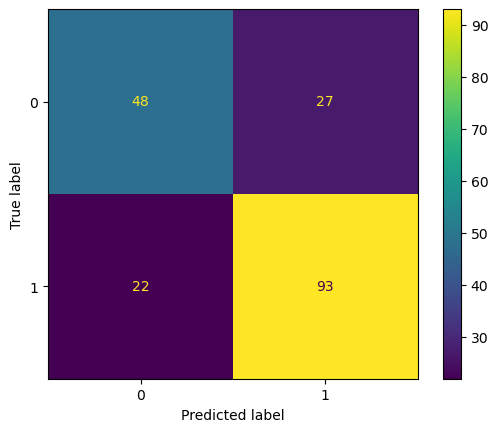

              precision    recall  f1-score   support

           0       0.69      0.64      0.66        75
           1       0.78      0.81      0.79       115

    accuracy                           0.74       190
   macro avg       0.73      0.72      0.73       190
weighted avg       0.74      0.74      0.74       190



In [19]:
y_proba = grid_search.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_grid = (y_proba >= threshold).astype(int)
#matrix confusion grid search
cm_grid = confusion_matrix(y_test, y_pred_grid, labels=best_rf_model.classes_)
disp_grid = ConfusionMatrixDisplay(confusion_matrix=cm_grid,
                                display_labels=best_rf_model.classes_)  
disp_grid.plot()
plt.show()  
print(classification_report(y_test, y_pred_grid))